# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import standardscaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Loading Dataset

In [7]:
df=pd.read_csv("C:\\Users\\mohsi\\Downloads\\ObesityDataSet.csv")

print(df.head())

    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC Smoke  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   

   Water_intake Family_history  FAF  TUE       CAEC                 MTRANS  \
0           2.0            yes  0.0  1.0  Sometimes  Public_Transportation   
1           3.0            yes  3.0  0.0  Sometimes  Public_Transportation   
2           2.0            yes  2.0  1.0  Sometimes  Public_Transportation   
3           2.0             no  2.0  0.0  Sometimes                Walking   
4           2.0             no  0.0  0.0  Sometimes  Public_Transportation   

         Obesity_level  
0        Normal_Weight  
1        Normal_Weight  
2        No

# Fetching Info

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2111 non-null   float64
 1   Gender          2111 non-null   object 
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   CALC            2104 non-null   object 
 5   FAVC            2100 non-null   object 
 6   FCVC            2105 non-null   float64
 7   NCP             2105 non-null   float64
 8   SCC             2105 non-null   object 
 9   Smoke           2103 non-null   object 
 10  Water_intake    2099 non-null   float64
 11  Family_history  2102 non-null   object 
 12  FAF             2103 non-null   float64
 13  TUE             2109 non-null   float64
 14  CAEC            2101 non-null   object 
 15  MTRANS          2100 non-null   object 
 16  Obesity_level   2111 non-null   object 
dtypes: float64(8), object(9)
memory u

# Checking For Null Values

In [9]:
print(df.isnull().sum())


Age                0
Gender             0
Height             0
Weight             0
CALC               7
FAVC              11
FCVC               6
NCP                6
SCC                6
Smoke              8
Water_intake      12
Family_history     9
FAF                8
TUE                2
CAEC              10
MTRANS            11
Obesity_level      0
dtype: int64


# Statistical Analysis

In [10]:
df.describe()

,Age,Height,Weight,FCVC,NCP,Water_intake,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2105.000000,2105.000000,2099.000000,2103.000000,2109.000000
mean,24.312600,1.701677,86.586058,2.418647,2.686532,2.006379,1.010074,0.657213
std,6.345968,0.093305,26.191172,0.534079,0.777495,0.612272,0.851254,0.608753
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658837,1.575789,0.120875,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.473548,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# Checking For Outliers

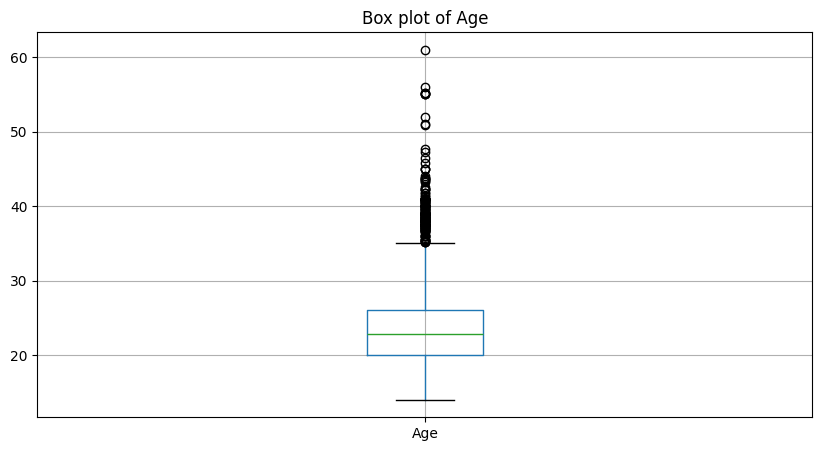

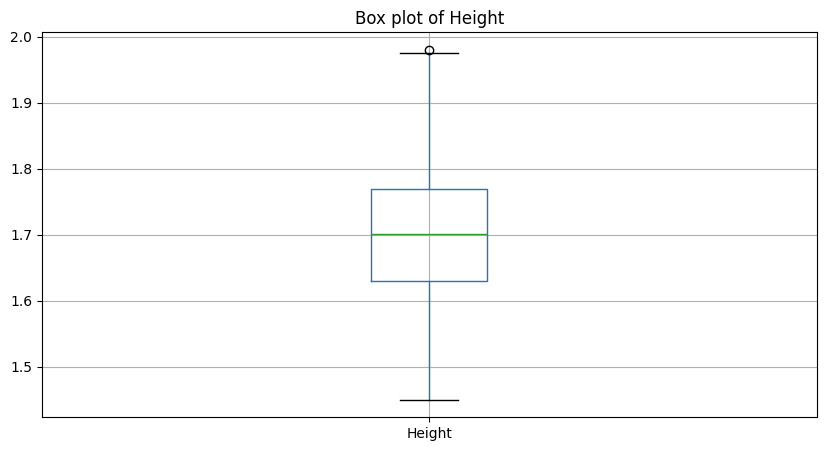

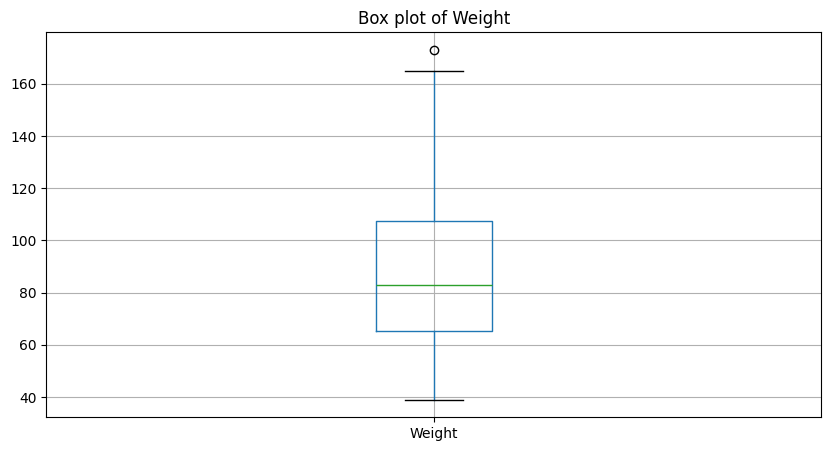

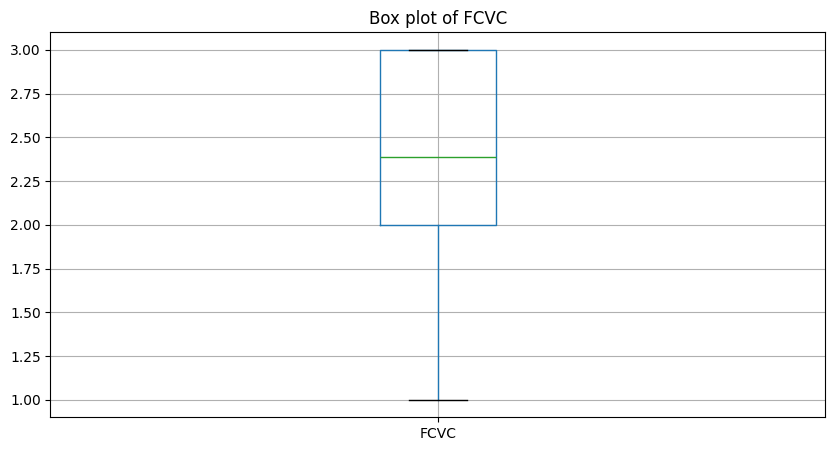

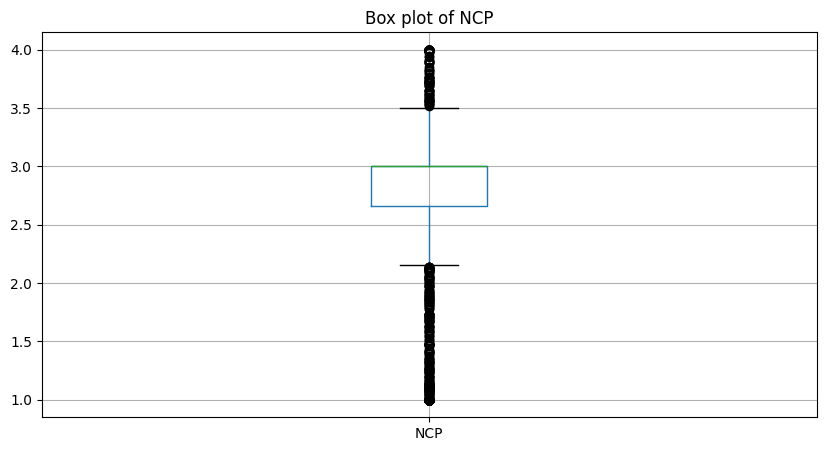

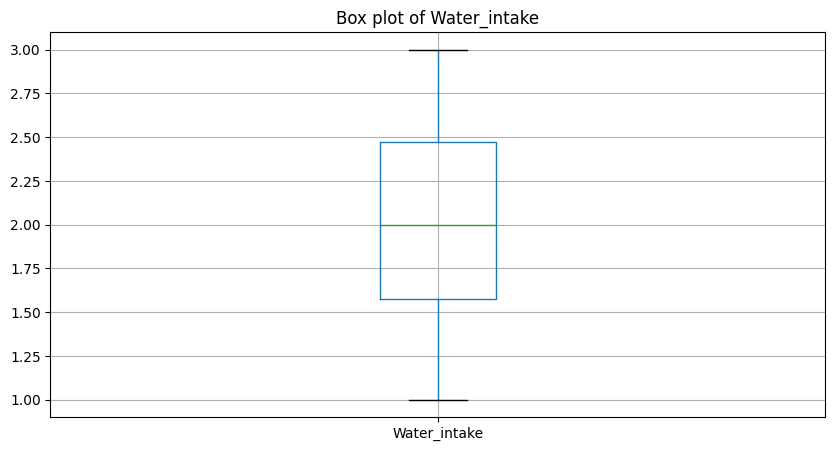

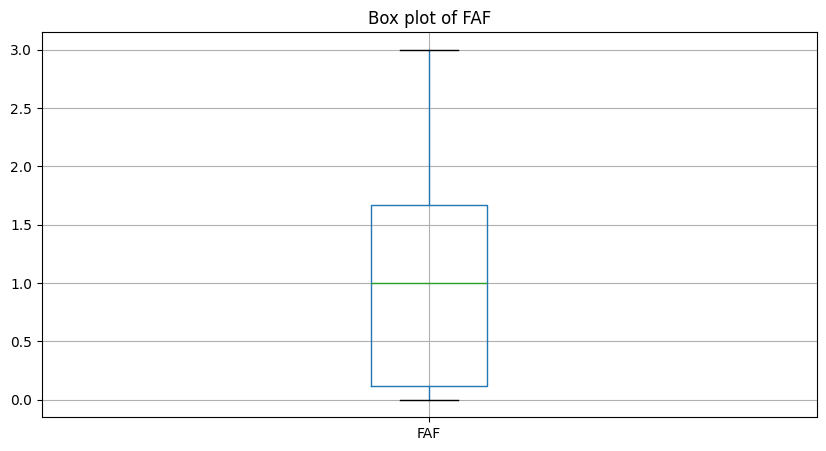

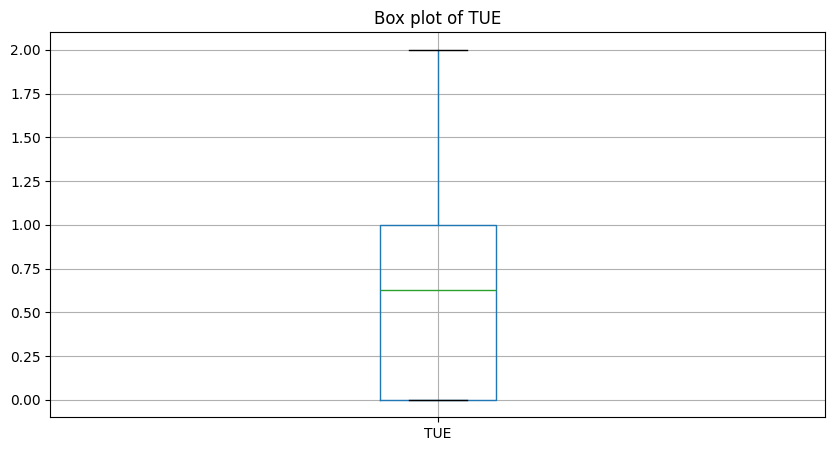

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load a dataset
df = pd.read_csv("C:\\Users\\mohsi\\Downloads\\ObesityDataSet.csv")

outliers = {}
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    df.boxplot([col])
    plt.title(f'Box plot of {col}')
    plt.show()

# Dropping The Outliers

In [7]:
outlier_filters = []

for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_filters.append(~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))))

combined_filter = pd.concat(outlier_filters, axis=1).all(axis=1)
df = df[combined_filter]

# Encoding The Values

In [8]:

missing_columns = [col for col in ['column1', 'column2'] if col not in df.columns]

if missing_columns:
    for col in missing_columns:
        df[col] = 0

df_encoded = pd.get_dummies(df, columns=['column1', 'column2'])


# Coorelation

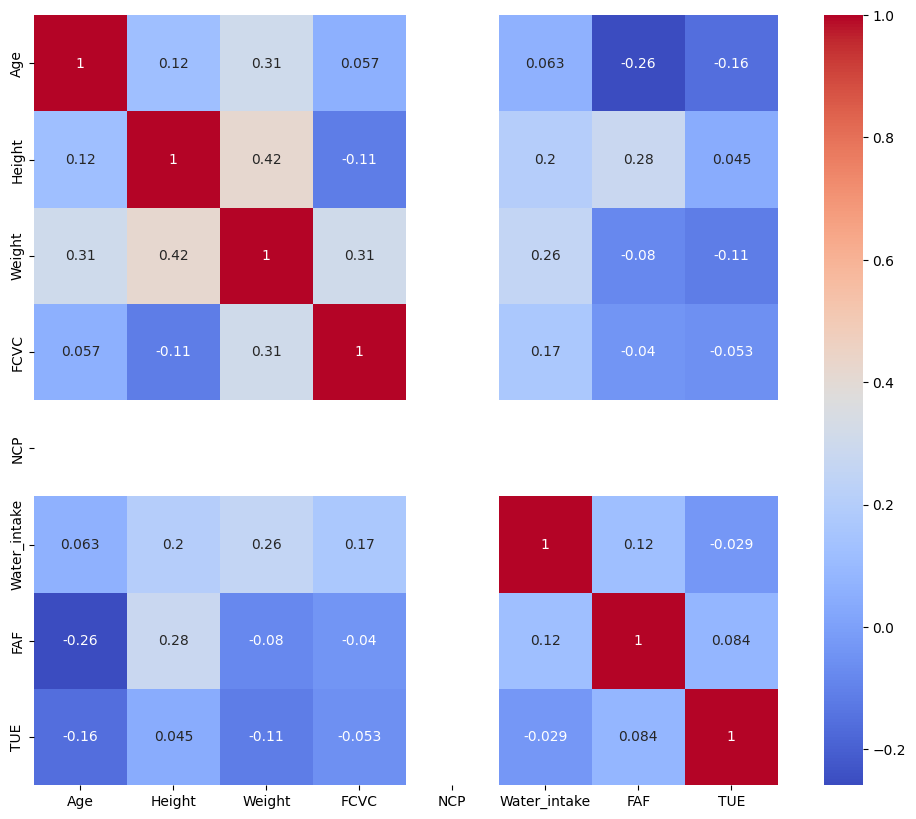

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns from df_encoded
df_numeric = df_encoded.select_dtypes(include=[np.number])

correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Encoding

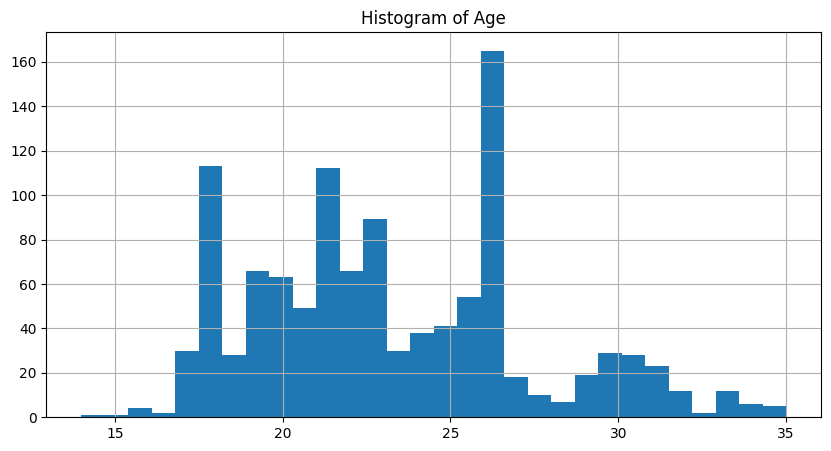

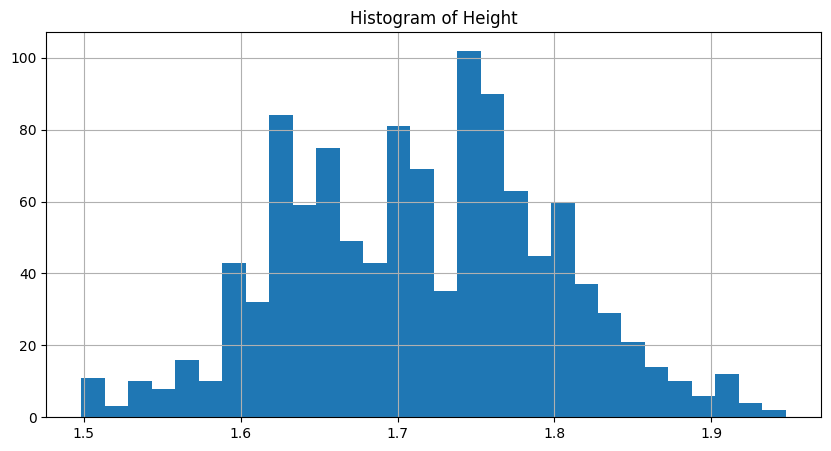

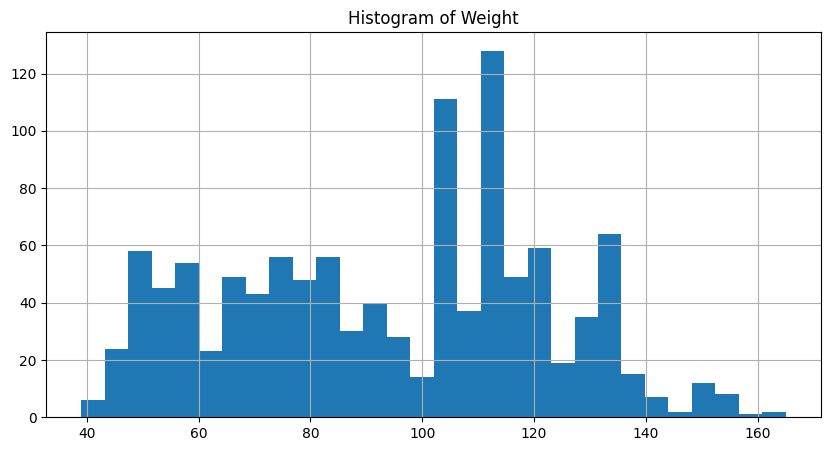

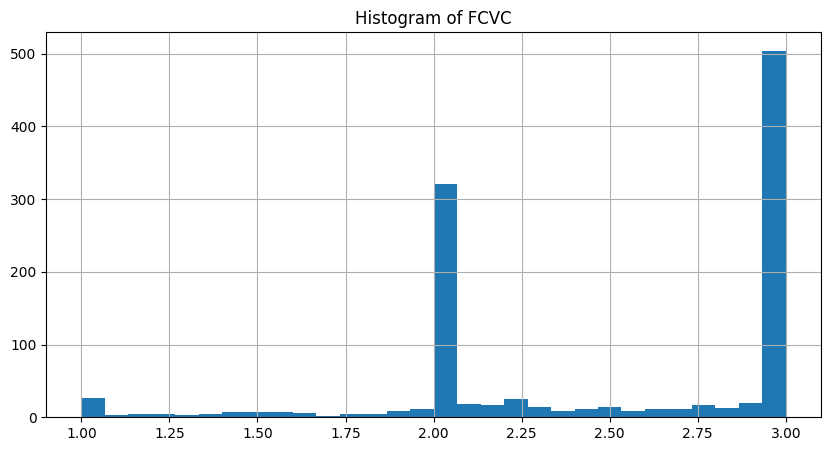

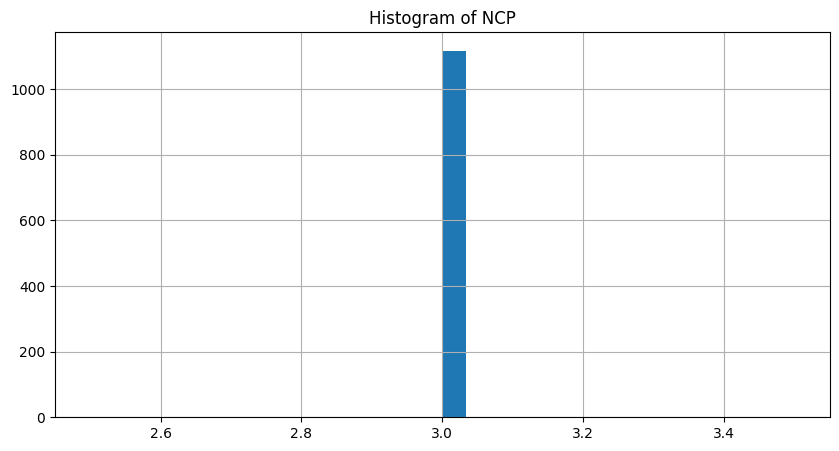

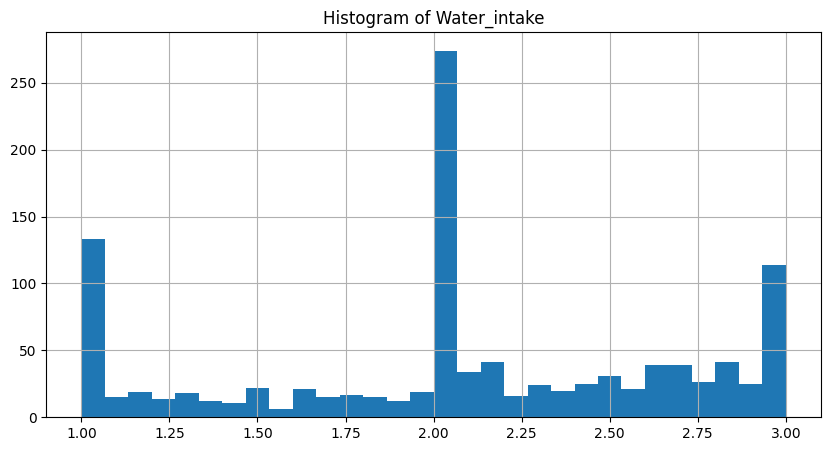

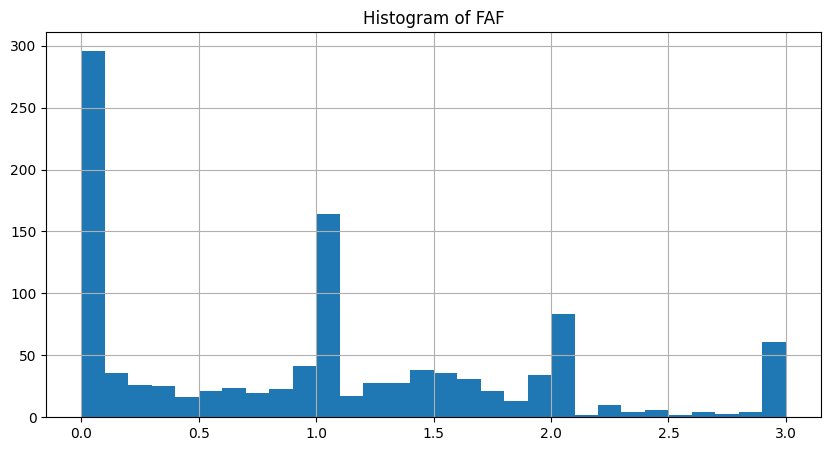

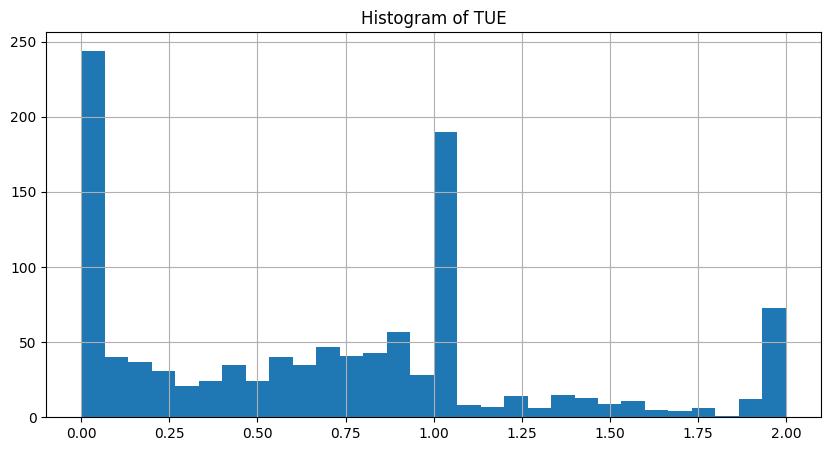

In [13]:
for col in df_encoded.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    df_encoded[col].hist(bins=30)
    plt.title(f'Histogram of {col}')
    plt.show()

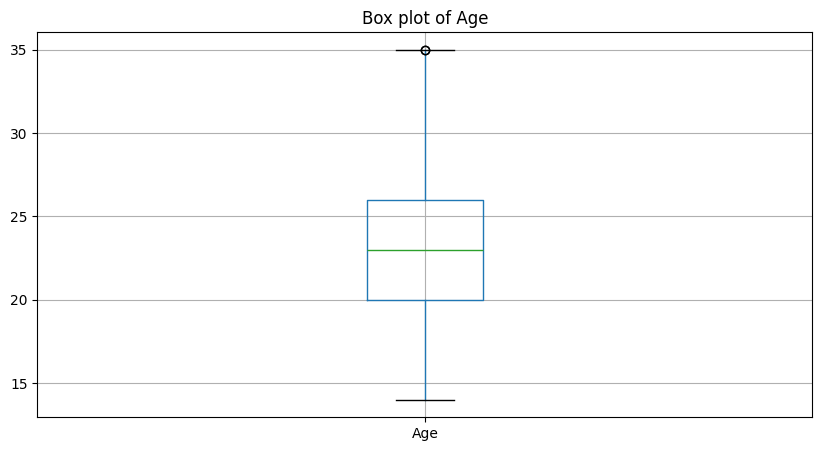

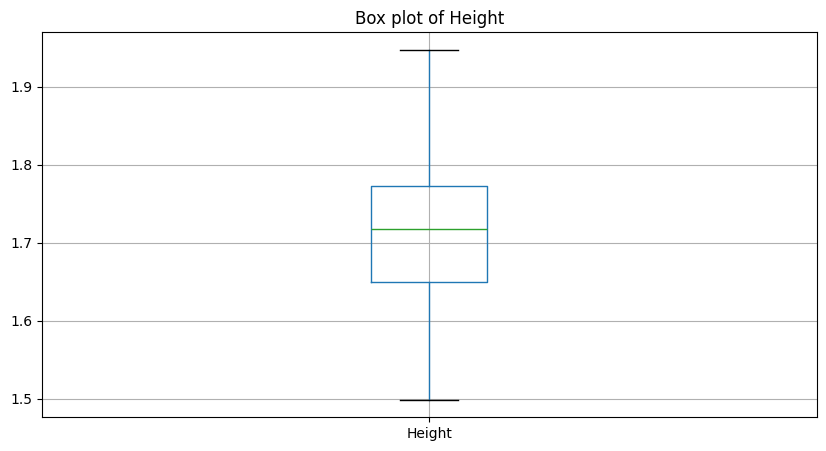

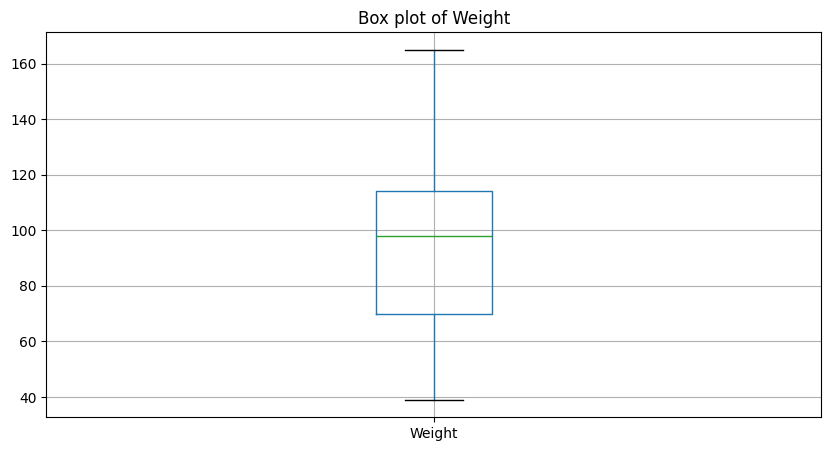

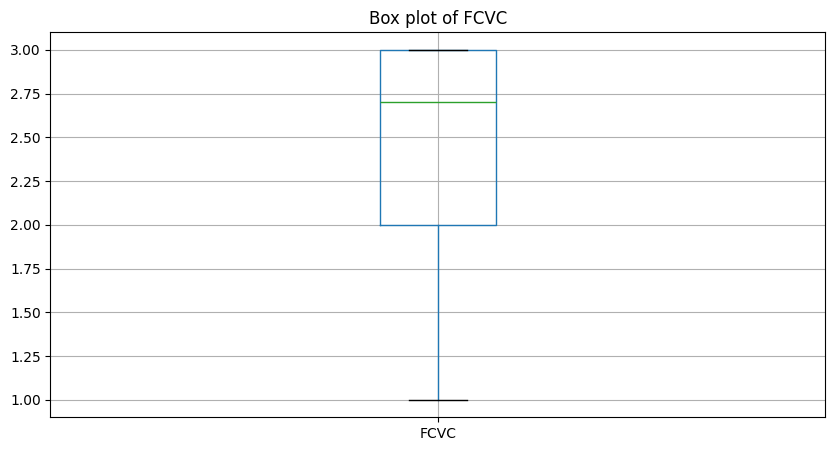

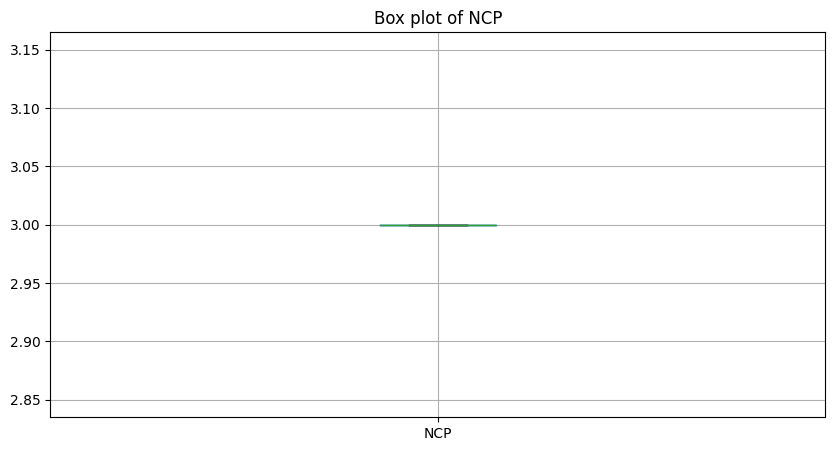

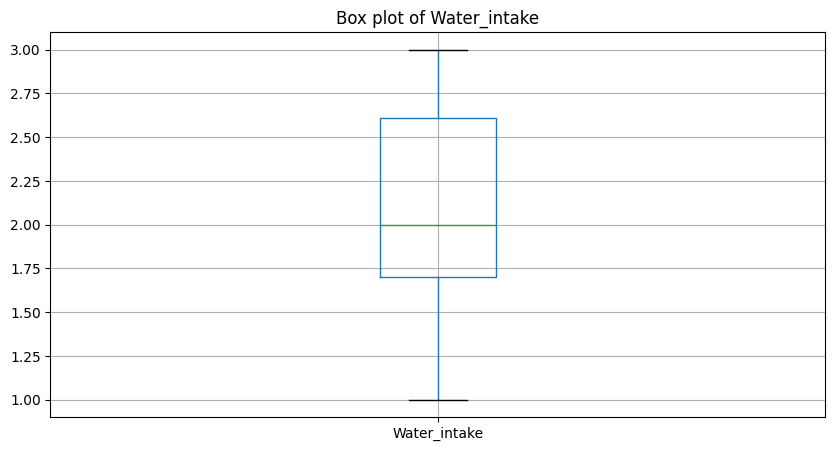

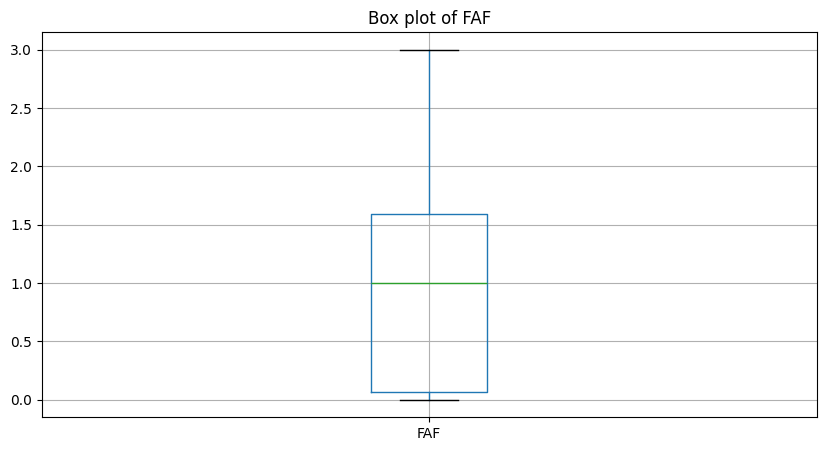

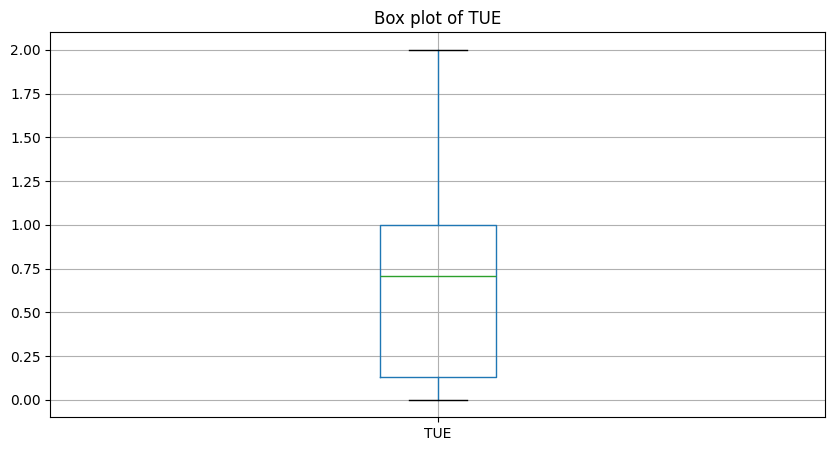

In [14]:
for col in df_encoded.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    df_encoded.boxplot([col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [15]:
print(df_encoded.columns)

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'Smoke', 'Water_intake', 'Family_history', 'FAF', 'TUE', 'CAEC',
       'MTRANS', 'Obesity_level', 'column1_0', 'column2_0'],
      dtype='object')


In [17]:
obesity_columns = ['Obesity_level_Insufficient_Weight', 'Obesity_level_Normal_Weight', 'Obesity_level_Obesity_Type_I', 'Obesity_level_Obesity_Type_II', 'Obesity_level_Obesity_Type_III', 'Obesity_level_Overweight_Level_I', 'Obesity_level_Overweight_Level_II']

if all(col in df_encoded.columns for col in obesity_columns):
    obesity_level = df_encoded[obesity_columns].idxmax(axis=1)
    df_encoded['Obesity_level'] = obesity_level.str.replace('Obesity_level_', '')
    df_encoded = df_encoded.drop(obesity_columns, axis=1)
else:
    print("One or more columns mentioned in the code block are not present in the dataframe.")


One or more columns mentioned in the code block are not present in the dataframe.


# Test Train Split

In [55]:


# Split the dataset into 70% training data and 30% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
   
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")

Decision Tree Accuracy: 92.86%
Random Forest Accuracy: 94.52%


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values